In [3]:
import pandas as pd
import numpy as np
from faker import Faker

# Set a random seed for reproducibility
np.random.seed(42)

# Function to generate a synthetic dataset with missing values and duplicates
def generate_dataset(num_rows=1000, missing_percentage=0.1):
    fake = Faker()

    data = {
        'ID': np.arange(1, num_rows + 1),
        'Name': [fake.name() for _ in range(num_rows)],
        'Age': [np.nan if np.random.rand() < missing_percentage else np.random.randint(18, 65) for _ in range(num_rows)],
        'Salary': [np.nan if np.random.rand() < missing_percentage else np.random.randint(30000, 100000) for _ in range(num_rows)],
    }

    df = pd.DataFrame(data)

    # Introduce duplicates
    df = pd.concat([df, df.sample(n=int(0.1*num_rows), replace=True)])

    # Reset index
    df.reset_index(drop=True, inplace=True)

    return df

# Generate a dataset with missing values and duplicates
synthetic_dataset = generate_dataset()

# Display the first few rows of the dataset
print(synthetic_dataset.head())

   ID             Name   Age   Salary
0   1  James Velasquez  46.0  44484.0
1   2   Olivia Hoffman  25.0  64503.0
2   3   April Trujillo  56.0  75113.0
3   4   Tiffany Powers  40.0  35249.0
4   5     Linda Peters   NaN  49201.0


In [22]:
import seaborn as sns

In [2]:
pip install faker

Note: you may need to restart the kernel to use updated packages.


In [4]:
df=synthetic_dataset


In [5]:
df

,ID,Name,Age,Salary
0,1,James Velasquez,46.0,44484.0
1,2,Olivia Hoffman,25.0,64503.0
2,3,April Trujillo,56.0,75113.0
3,4,Tiffany Powers,40.0,35249.0
4,5,Linda Peters,NaN,49201.0
...,...,...,...,...
1095,936,Anthony Dixon,19.0,85612.0
1096,811,Brian King,61.0,85276.0
1097,150,Sarah Clark,48.0,81612.0
1098,660,Karen Fox,NaN,85745.0


In [13]:
df.describe()

,ID,Age,Salary
count,1100.000000,982.000000,980.000000
mean,504.134545,41.345214,64843.108163
std,290.176364,13.794397,20588.985076
min,1.000000,18.000000,30112.000000
25%,250.750000,29.000000,46963.500000
50%,508.500000,42.000000,64557.500000
75%,755.250000,53.750000,82893.000000
max,1000.000000,64.000000,99906.000000


In [16]:
df.dtypes

ID          int32
Name       object
Age       float64
Salary    float64
dtype: object

In [18]:
df.duplicated().sum()

100

In [10]:
df['Name'].isnull().sum()

0

In [11]:
df['Age'].isnull().sum()

118

In [12]:
df['Salary'].isnull().sum()

120

In [ ]:
#first remove the duplicate rows

In [21]:
df=df[~df.duplicated()]
df

,ID,Name,Age,Salary
0,1,James Velasquez,46.0,44484.0
1,2,Olivia Hoffman,25.0,64503.0
2,3,April Trujillo,56.0,75113.0
3,4,Tiffany Powers,40.0,35249.0
4,5,Linda Peters,NaN,49201.0
...,...,...,...,...
995,996,Sharon Hunt,50.0,53993.0
996,997,Jessica George,58.0,76287.0
997,998,Joan Robinson,30.0,38210.0
998,999,Amy Cooper,19.0,63340.0


<AxesSubplot:xlabel='Age', ylabel='Salary'>

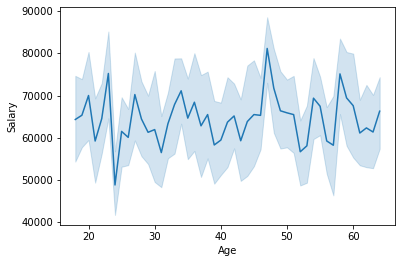

In [24]:
#Let fill the missing values
sns.lineplot(data=df,x='Age',y='Salary')

In [29]:
#there is no linear relationbetween columns age and Salary let we them based on the values of  own columns alone using mean
df['Age']=df['Age'].fillna(df['Age'].mean())

C:\Users\sakth\AppData\Local\Temp\ipykernel_17220\957142738.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Age']=df['Age'].fillna(df['Age'].mean())


In [30]:
df['Age'].isnull().sum()

0

In [31]:
df['Salary']=df['Salary'].fillna(df['Salary'].mean())

C:\Users\sakth\AppData\Local\Temp\ipykernel_17220\848608217.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Salary']=df['Salary'].fillna(df['Salary'].mean())
